# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<p><em><b>Признаки</b></em></p>
<ul>
 <li><b>RowNumber</b> — индекс строки в данных</li>
 <li><b>CustomerId</b>  — уникальный идентификатор клиента</li>
 <li><b>Surname</b>  — фамилия</li>
 <li><b>CreditScore </b> — кредитный рейтинг </li>
 <li><b>Geography</b> — страна проживания</li>
 <li><b>Gender</b> — пол</li>
 <li><b>Tenure</b>  — сколько лет человек является клиентом банка</li>
 <li><b>Balance</b> — баланс на счёте </li>
 <li><b>NumOfProducts</b>— количество продуктов банка, используемых клиентом</li>
<li><b>HasCrCard</b> — наличие кредитной карты </li>
<li><b>IsActiveMember</b>— активность клиента</li>
<li><b>EstimatedSalary</b> — предполагаемая зарплата</li>
</ul>
<p><em><b>Целевой признак</b></em></p>
<ul>
<li><b> Exited</b> — факт ухода клиента</li>
</ul>




## Подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from joblib import dump
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import*
from sklearn.metrics import*
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv('/datasets/Churn.csv')
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

### Предварительные выводы:
<ol>
    <li>в датасете 11 столбцов с численными данными (целые и вещественные) и 3 столбца с  типом object. Здесь могут быть как текстовые, так и смешанные числовые и нечисловые значения. Уточним эти данные в дальнейшем;</li>
    <li>названия столбцов записаны с загланых букв, запишем имена столбцов в нижнем регистре;
</ul>

### Изменим регистр букв в названиях столбцов и посмотрим содержание датасета:

In [ ]:
df.columns = map(str.lower, df.columns)
df.head(10)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Посмотрим сколько пропущенных значений в датасете

In [ ]:
pd.DataFrame(df.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
tenure,9.090000
exited,0.000000
estimatedsalary,0.000000
isactivemember,0.000000
hascrcard,0.000000
numofproducts,0.000000
balance,0.000000
age,0.000000
gender,0.000000
geography,0.000000


Как видим пропущенные значения есть только в столбце 'tenure', причем менее 10%, поэтому этими строками можно пренебречь и удалить их.

In [ ]:
df = df.dropna(subset=['tenure'])
df['tenure'] = df['tenure'].astype('int64')# поменяем на целочисленный тип

In [ ]:
df['tenure'].unique()#проверим смену типа данных

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [ ]:
def age_cat(age): #сделаем классификацию по возрастам
    try:
        if 18 <= age <= 30:
            return '18-30'
        elif 31 <= age <= 40:
            return '31-40'
        elif 41 <= age <= 50:
            return '41-50'
        elif 51 <= age <= 60:
            return '51-60'
        elif 61 <= age <= 70:
            return '61-70'
        elif age >= 71:
            return 'более 70'
    except:
        pass
df['age_category'] = df['age'].apply(age_cat)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        9091 non-null   int64  
 1   customerid       9091 non-null   int64  
 2   surname          9091 non-null   object 
 3   creditscore      9091 non-null   int64  
 4   geography        9091 non-null   object 
 5   gender           9091 non-null   object 
 6   age              9091 non-null   int64  
 7   tenure           9091 non-null   int64  
 8   balance          9091 non-null   float64
 9   numofproducts    9091 non-null   int64  
 10  hascrcard        9091 non-null   int64  
 11  isactivemember   9091 non-null   int64  
 12  estimatedsalary  9091 non-null   float64
 13  exited           9091 non-null   int64  
 14  age_category     9091 non-null   object 
dtypes: float64(2), int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
df_gender=df.groupby('gender')['gender'].count().sort_values(ascending=False)

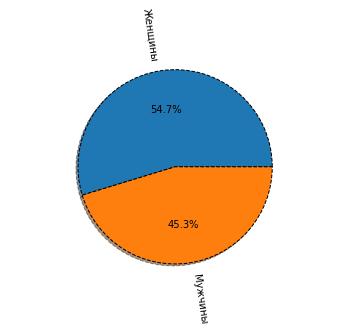

In [ ]:
labels = ['Женщины','Мужчины']
fig, ax = plt.subplots()
ax.pie(df_gender, labels=labels, autopct='%1.1f%%', shadow=True,
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

Круговая диаграмма показывает, что мужчин и женщин среди клиентов примерно поровну

In [ ]:
df_age=df.groupby('age_category')['age_category'].count().sort_values(ascending=False)
#print(df_age)
#df_age=df.groupby('age_category')['exited'].sum().sort_values(ascending=False)

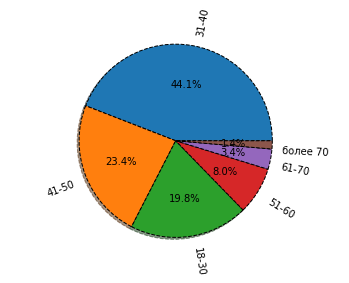

In [ ]:
labels = ['31-40','41-50','18-30','51-60','61-70','более 70']
fig, ax = plt.subplots()
ax.pie(df_age, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_geography=df.groupby('geography')['geography'].count().sort_values(ascending=False)
print(df_geography)

geography
France     4550
Germany    2293
Spain      2248
Name: geography, dtype: int64


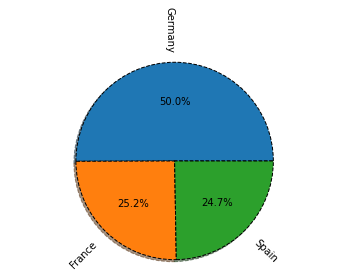

In [ ]:
labels = ['Germany','France','Spain']
fig, ax = plt.subplots()
ax.pie(df_geography, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

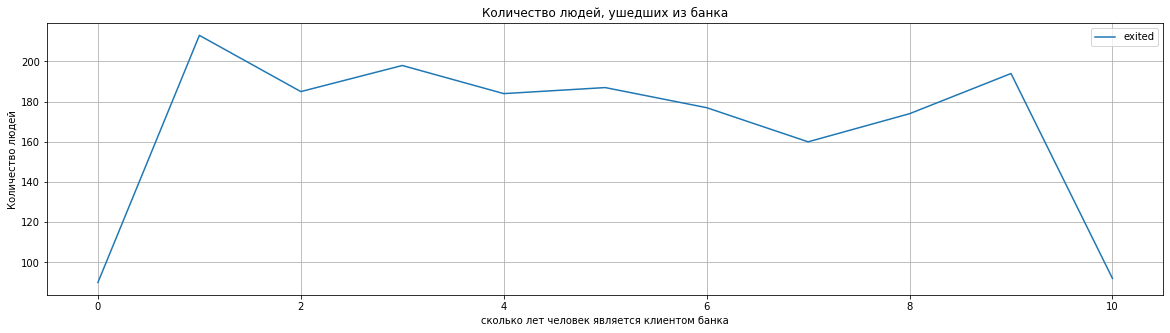

In [ ]:
df.query('exited==1').pivot_table(index='tenure', values='exited', aggfunc='count').plot(
    grid=True,
    figsize=(20, 5),
      )
plt.title('Количество людей, ушедших из банка')
plt.xlabel('сколько лет человек является клиентом банка')
plt.ylabel('Количество людей')
plt.show()

<AxesSubplot:>

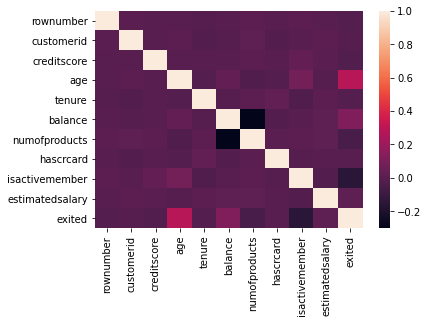

In [ ]:
sns.heatmap(df.corr())#корреляционная матрица

Корреляционная матрица показывает, что сильных зависимостей здесь не возникает, поэтому все признаки можно оставить.

### Выводы по предварительной подготовке данных:
<ol>
    <li>Пропущенные значения наблюдаются только в столбце 'tenure', причем менее 10%, поэтому мы ими пренебрегли. </li>
    <li>Значения в этом столбце имеют вещественный тип, поменяли его на целочисленный. </li>
    <li>Среди клиентов банка мужчин и женщин примерно поровну. Большинство клиентов в возрастной категории от 30 до 40 лет, меньше всего  - от 60 лет и более.</li>
    <li>Банк имеет представительства в Германии, Франции и Испании. Большинство клиентов в Германии.</li>
    <li>Люди, которые являются клиентами банка более 9 лет, реже покидают банк.</li>
    </ol>

## Исследование задачи

### Удалим несущественные на наш взгляд признаки

In [ ]:
not_informative = ['rownumber','customerid','surname','age_category']
df = df.drop(columns=not_informative)

In [ ]:
df.head(5)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Преобразуем категориальные переменные в фиктивные переменные

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head(5)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Разделим данные с использованием функции Scikit-learn train_test_split. Разобъем датасет на тренировочную, валидационную и тестовую выборки (60%, 20%, 20%)

In [ ]:
target = df['exited']
features = df.drop('exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4,
                                                                              random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5,
                                                                              random_state=12345, stratify=target_valid)

### Стандартизируем численные признаки обучающей и валидационной выборок

In [ ]:
numeric = ['creditscore','age','tenure','balance','numofproducts','estimatedsalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None
print(features_train.head(5))

      creditscore       age    tenure   balance  numofproducts  hascrcard  \
9723    -1.292898 -0.660843  0.686341  0.786636      -0.910943          0   
1224    -1.563714  0.778434  1.034232  0.833795      -0.910943          1   
8377     1.581914  0.106771 -0.357331 -1.222967       0.789359          1   
8014     0.842379  0.010820 -1.053112  0.807063      -0.910943          1   
2491    -0.397123 -1.236554 -0.357331 -1.222967       0.789359          1   

      isactivemember  estimatedsalary  geography_Germany  geography_Spain  \
9723               0        -0.223548                  0                0   
1224               0         1.383021                  0                1   
8377               1        -0.308331                  0                1   
8014               1        -0.430980                  0                1   
2491               1         1.392642                  0                1   

      gender_Male  
9723            1  
1224            0  
8377          

### Проверим сбалансированность классов в целевом признаке

0    0.796062
1    0.203938
Name: exited, dtype: float64


<AxesSubplot:>

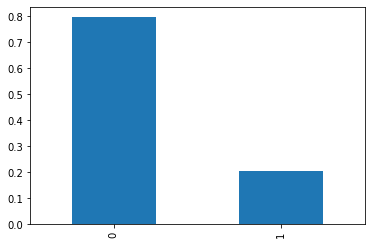

In [ ]:
class_frequency = target.value_counts(normalize=True)# < напишите код здесь >)
print(class_frequency)
class_frequency.plot(kind='bar')

### Изучим модели без исправления дисбаланса

In [ ]:
X_train = features_train
y_train = target_train

#### Воспользуемся DecisionTreeClassifier для подбора гиперпараметров на обучающей выборке для моделей: <b>обучающее дерево, логистическая регрессия и случайный лес</b>

<b>1) Обучающее дерево</b>

In [ ]:
%%time
clf = DecisionTreeClassifier()
parametrs = {
           'max_depth': range (2,13, 2),
           'min_samples_leaf': range (1,8),
           'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 11.4 s, sys: 1.88 ms, total: 11.4 s
Wall time: 11.4 s


{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

<b>2) Логистическая регрессия</b>

In [ ]:
%%time
clf = LogisticRegression()
parametrs = {
             'penalty': ['l1', 'l2'],
             'C':range(1, 4, 2),
              'solver' : ['liblinear'] }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 1.33 s, sys: 1.37 s, total: 2.7 s
Wall time: 2.63 s


{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

<b>3) Случайный лес</b>

In [ ]:
%%time
clf = RandomForestClassifier()
parametrs = { 'n_estimators': range (20, 41, 10),
              'max_depth': range (1,16, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 5min 52s, sys: 1.5 s, total: 5min 53s
Wall time: 5min 54s


{'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 30}

<b>Наборы лучших гиперпараметров:</b>

- для модели дерево решений:max_depth=6,min_samples_leaf=4, min_samples_split=8

- для модели логистическая регрессия:penalty=l1',C=1)

- для модели случайный лес: max_depth=11,min_samples_leaf=5,  min_samples_split= 6,n_estimators=20

#### Посмотрим как работают модели с выбранными гиперпараметрами:

<b>1) Обучающее дерево</b>

Матрица ошибок [[1406   41]
 [ 201  170]]
Полнота 0.4582210242587601
Точность 0.8056872037914692
f1-мера 0.584192439862543


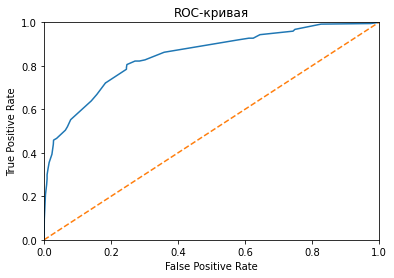

0.8453916179398961


In [ ]:
model = DecisionTreeClassifier(random_state=12345,max_depth=6, min_samples_leaf=4, min_samples_split= 8)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("Матрица ошибок", confusion_matrix(target_valid, predicted_valid) )
print("Полнота",recall_score(target_valid,predicted_valid))
print("Точность",precision_score(target_valid,predicted_valid))
print("f1-мера", f1_score(target_valid,predicted_valid))
fpr, tpr, thresholds =roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print(auc_roc)

<b>2) Логистическая регрессия</b>

Матрица ошибок [[1399   48]
 [ 288   83]]
Полнота 0.22371967654986524
Точность 0.6335877862595419
f1-мера 0.3306772908366534


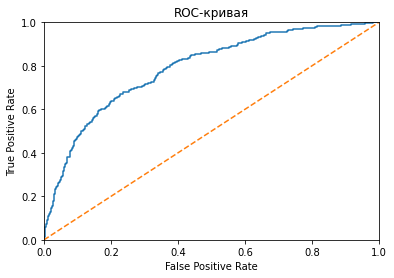

0.7893010355098474


In [ ]:
model = LogisticRegression(random_state=12345, C=1, penalty='l2', solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("Матрица ошибок", confusion_matrix(target_valid, predicted_valid))
print("Полнота",recall_score(target_valid,predicted_valid))
print("Точность",precision_score(target_valid,predicted_valid))
print("f1-мера", f1_score(target_valid,predicted_valid))
fpr, tpr, thresholds =roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(auc_roc)

<b>3) Случайный лес</b>

In [ ]:
model = RandomForestClassifier(random_state=12345,max_depth=13,min_samples_leaf=5, min_samples_split= 6,n_estimators=40)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("Матрица ошибок", confusion_matrix(target_valid, predicted_valid) )
print("Полнота",recall_score(target_valid,predicted_valid))
print("Точность",precision_score(target_valid,predicted_valid))
print("f1-мера", f1_score(target_valid,predicted_valid))

Матрица ошибок [[1406   41]
 [ 192  179]]
Полнота 0.48247978436657685
Точность 0.8136363636363636
f1-мера 0.6057529610829104


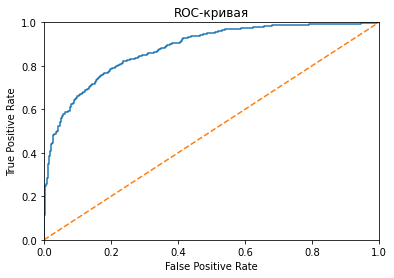

0.8788049258899815


In [ ]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
fpr, tpr, thresholds =roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print(auc_roc)

## Борьба с дисбалансом

 Посмотрим различные способы борьбы с дисбалансом

### Взвешивание классов

<b>1) Обучающее дерево</b>

In [ ]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6, min_samples_leaf=4, min_samples_split= 4,class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_DTC_1= round(f1_score(target_valid, predicted_valid),3)
print("F1:", f1_DTC_1)

F1: 0.587


<b>2) Логистическая регрессия</b>

In [ ]:
model = LogisticRegression(random_state=12345, C=1, penalty='l1', solver='liblinear',class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_LR_1=round(f1_score(target_valid, predicted_valid),3)
print("F1:", f1_LR_1)

F1: 0.507


<b>3) Случайный лес</b>

In [ ]:
model = RandomForestClassifier(random_state=12345, max_depth=11,min_samples_leaf=5, min_samples_split= 6,n_estimators=20,class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_RFC_1=round(f1_score(target_valid, predicted_valid),3)
print("F1:",f1_RFC_1)

F1: 0.621


### Увеличение выборки

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts())

1    4448
0    4342
Name: exited, dtype: int64


In [ ]:
X_train = features_upsampled
y_train = target_upsampled

Подберем гиперпараметры при увеличении выборки и обучим с ними модели

<b>1) Обучающее дерево</b>

In [ ]:
%%time
clf = DecisionTreeClassifier()
parametrs = {
           'max_depth': range (2,13, 2),
           'min_samples_leaf': range (1,8),
           'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 15.2 s, sys: 7.88 ms, total: 15.2 s
Wall time: 15.2 s


{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
model = DecisionTreeClassifier(random_state=12345, max_depth=12, min_samples_leaf=1, min_samples_split= 2)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_DTC_2=  round(f1_score(target_valid, predicted_valid),3)
print("F1:",f1_DTC_2)

F1: 0.509


<b>2) Логистическая регрессия</b>

In [ ]:
%%time
clf = LogisticRegression()
parametrs = {
             'penalty': ['l1', 'l2'],
             'C':range(1, 4, 2),
              'solver' : ['liblinear'] }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 1.58 s, sys: 1.76 s, total: 3.34 s
Wall time: 3.34 s


{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
model=LogisticRegression(random_state=12345,C=1, penalty='l1',solver='liblinear',max_iter=1000)
model.fit(features_upsampled, target_upsampled)
predicted_valid=model.predict(features_valid)
f1_LR_2=round(f1_score(target_valid, predicted_valid),3)
print("F1:", f1_LR_2)

F1: 0.505


<b>3) Случайный лес</b>

In [ ]:
%%time
clf = RandomForestClassifier()
parametrs = { 'n_estimators': range (20, 40, 10),
              'max_depth': range (1,16, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 4min 25s, sys: 895 ms, total: 4min 26s
Wall time: 4min 27s


{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

0.623


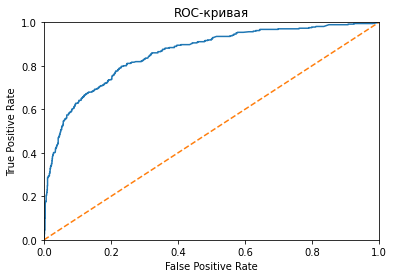

0.8578441873417815


In [ ]:
model = RandomForestClassifier(random_state=12345, max_depth=15,min_samples_leaf=1, min_samples_split= 2,n_estimators=30)
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
f1_RFC_2=round(f1_score(target_valid, predicted_valid),3)
print(f1_RFC_2)
fpr, tpr, thresholds =roc_curve(target_valid, probabilities_one_valid)
#plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print(roc_auc_score(target_valid, probabilities_one_valid))

### Уменьшение выборки

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print(target_downsampled.value_counts())

1    1112
0    1086
Name: exited, dtype: int64


In [ ]:
X_train = features_downsampled
y_train = target_downsampled

Подберем гиперпараметры при уменьшении выборки

<b>1) Обучающее дерево</b>

In [ ]:
%%time
clf = DecisionTreeClassifier()
parametrs = {
           'max_depth': range (2,13, 2),
           'min_samples_leaf': range (1,8),
           'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 6.3 s, sys: 0 ns, total: 6.3 s
Wall time: 6.32 s


{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [ ]:
model = DecisionTreeClassifier(random_state=12345, max_depth=12, min_samples_leaf=1, min_samples_split= 2)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_DTC_3=round(f1_score(target_valid, predicted_valid),3)
print("F1:", f1_DTC_3)

F1: 0.52


<b>2) Логистическая регрессия</b>

In [ ]:
%%time
clf = LogisticRegression()
parametrs = {
             'penalty': ['l1', 'l2'],
             'C':range(1, 4, 2),
              'solver' : ['liblinear'] }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 149 ms, sys: 0 ns, total: 149 ms
Wall time: 157 ms


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
model=LogisticRegression(random_state=12345,C=1, penalty='l1',solver='liblinear', max_iter=1000)
model.fit(features_downsampled,target_downsampled)
predicted_valid=model.predict(features_valid)
f1_LR_3=round(f1_score(target_valid, predicted_valid),3)
print("F1:", f1_LR_3)

F1: 0.512


<b>3) Случайный лес</b>

In [ ]:
%%time
clf = RandomForestClassifier()
parametrs = { 'n_estimators': range (20, 40, 10),
              'max_depth': range (1,16, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 1min 59s, sys: 733 ms, total: 2min
Wall time: 2min


{'max_depth': 13,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 30}

In [ ]:
model = RandomForestClassifier(random_state=12345, max_depth=13,min_samples_leaf=3, min_samples_split= 2,n_estimators=30)
model.fit(features_downsampled,target_downsampled)
predicted_valid = model.predict(features_valid)
f1_RFC_3=round(f1_score(target_valid, predicted_valid),3)
print("F1:",f1_RFC_3)

F1: 0.606


In [ ]:

final_table=[['Модель','DTC',' RFC','LR'],['Взвешивание классов',f1_DTC_1,f1_RFC_1,f1_LR_1],
             ['Увеличение выборки',f1_DTC_2,f1_RFC_2,f1_LR_2],
             ['Уменьшение выборки',f1_DTC_3,f1_RFC_3,f1_LR_3]]
for row in final_table:
    for col in row:
        print(f'{col:<20}', end='   ')
    print()

Модель                 DTC                     RFC                   LR                     
Взвешивание классов    0.587                  0.621                  0.507                  
Увеличение выборки     0.509                  0.623                  0.505                  
Уменьшение выборки     0.52                   0.606                  0.512                  


По результатам работы с дисбалансом можно заключить, что наиболее эффективным способом является <b>увеличение выборки</b>. Наилучший результат показала модель <b>Случайного леса</b>.

 <b>Кривая AUC ROC</b>

Оценим качество построенной модели, построив кривую AUC ROC.
Площадь под кривой (AUC) является мерой способности классификатора различать классы, поэтому чем будет выше площадь под нашей кривой, тем лучше производительность модели.

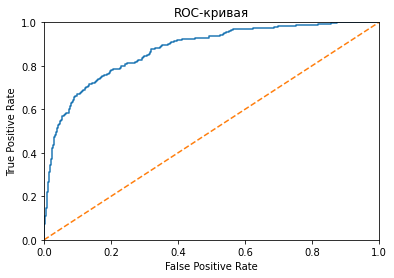

0.8739840957311065


In [ ]:
model = RandomForestClassifier(random_state=12345, max_depth=15,min_samples_leaf=5, min_samples_split= 2,n_estimators=30)
model.fit(features_downsampled,target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds =roc_curve(target_valid, probabilities_one_valid)
#plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print(roc_auc_score(target_valid, probabilities_one_valid))

Значение 0,87 показывает нам, что высока вероятность, что классификатор сможет различить положительные и отрицательных значения класса.

## Тестирование модели

Поскольку чем больше данных, тем лучше модель может обучиться, обучим модель с выбранными гиперпараметрами на тренировочной + валидационной выборке. И эту дообученную модель проверим на тесте.

In [ ]:
features_train_valid = pd.concat([features_train, features_valid])
target_train_valid = pd.concat([target_train, target_valid])
features_upsampled, target_upsampled = upsample(features_train_valid,target_train_valid, 4) #воспользуемся ранее описанной функцией

model = RandomForestClassifier(random_state=12345, max_depth=15,min_samples_leaf=5, min_samples_split= 2,n_estimators=30)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1=round(f1_score(target_test, predicted_test),3)
print("F1:",f1)

F1: 0.604


На тестовой выборке модель показала значение f1-меры более 0,60, что соответствует поставленной задаче.

<p><em><b>Итоговый вывод:</b></em></p>
<ul>
 <li>предварительно были изучены и подготовлены данные для дальнейшей работы по анализу ситуации с оттоком клиентов из банка;</li>
 <li>были обработаны данные на предмет наличия пропусков, изменены типы данных, там где это целесообразно;</li>
 <li>дана характеристика клиентам банка по заданным признакам;</li>
  <li>были удалены несущественные относительно задач исследования признаки;</li>
     <li>раделен датасет на тренировочную, валидационную и тестовую выборки;</li>
     <li>произведена стандартизация численных признаков выборок;</li>
     <li>изучили модели без учета дисбаланса, при этом случайный лес показал неплохой результат: f1=0,606 и roc_auc=0,879; </li>
     <li>при учете параметра взвешивания классов лучший результат был по прежнему у случайного леса -  f1=0,621;</li>
     <li>при увеличении выборки у случайного леса метрики незначительно повысились: f1=0,623, это самый лучший показатель;</li>
     <li>при уменьшении случайный лес показал снижение f1=0,59 и roc_auc=0,874;</li>
    <li>На тестовой выборке модель случайного леса показала значение f1-меры более 0,60, что соответствует поставленной задаче.</li>